<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Medidas de Distancia y Similitud. </font> </center>



## Introducción

Ya que se tiene determinado el tipo de dato a utilizar, se pueden realizar una medida de similitud
proponiendo el índice adecuado apropiado. 

>La primera y más importante es evitar la combinación de datos, esto debido a que cada tipo de dato presenta características propias que no comparten con los de otra naturaleza.

>Un índice de similitud $\delta_{i,j}$ es una medida de que tan parecido es un dato $i$ con otro $j$. Generalmente, las similaridades están acotadas en el rango de cero a uno; un aumento en la similaridad implica un aumento de la semejanza entre datos o variables, y toda similaridad de un dato consigo mismo debería ser igual al máximo valor posible, es decir, uno.

>Las distancias en cambio disminuyen con un aumento del parecido, no son negativas y la distancia de un elemento consigo mismo es cero. Tanto las matrices de similaridades como las de distancias son simétricas; es decir, la distancia entre el individuo `a` y el `b` es la misma que entre el `b` y el `a`.

>Dependiendo del método elegido para la ordenación, la clasificación, o el cálculo de índices de diversidad, así como de la escala de medición de los rasgos funcionales, la asociación entre los datos se expresará en términos de similaridad o distancia. Sin embargo, las similaridades pueden transformarse en distancias y viceversa.

Para el rango cero-uno, la similaridad $\delta_{i,j}$ puede ser transformada a distancia $d_{i,j}$ de la siguientes
formas:

$$d_{i,j} = 1 - \delta_{i,j}$$

$$d_{i,j} = \sqrt{1-\delta_{i,j}}$$

$$d_{i,j} = \sqrt{\delta_{i,j} -2\delta_{i,j} + \delta_{i,j}}$$

$$d_{i,j} = -\log{(\delta_{i,j})}$$

>El uso de índices de diversidad funcional basados en distancias, así como los métodos de
clasificación y/o de ordenación requiere una comprensión de las propiedades de la escala de
medición de los rasgos funcionales de las especies, y de las características de las medidas de
semejanza asociadas a cada tipo de datos.

## Similitud en Datos de Doble Estado o Binarios

Cuando la matriz de datos $X$, proviene de la observación de $n$ atributos que toman el valor 0 si la característica está ausente y el valor 1 si está presente, la información del grado de asociación entre cualquier par de individuos y puede representarse como una tabla de contingencia de 2x2 conocida conmunmente como **Matriz de Confusión**.

|             |               |               |$Muestra_j$   |         |
|:-----------:| ------------- |:-------------:|:------------:|:-------:|
|             |               |**Presente(1)**|**Ausente(0)**|         |
|             |**Presente(1)**|        a      |       b      |`a+b`    |
|$Muestra_i$  |**Ausente(0)** |        c      |       d      |`c+d`    |
|             |               |      `a+c`    |     `b+d`    |`a+b+c+d`|     

Donde $a$ es el número de caracteres presentes comunes, $b$ es el número de caracteres presente en
$i$ pero no en $j$, $c$ es el número de caracteres presentes en $j$ pero no presentes en $i$ y d es número
de caracteres no presentes en ambos datos. Para la matriz $X$ de dimensión $m × n$, es posible crear
o construir $\frac{n(n−1)}{2}$ Matrices de Confusión. 

Se han propuesto diversas medidas de similaridad que verifican estas propiedades, entre otros, Jaccard (1908), Rusell y Rao (1940), Sorensen (1948) y Sokal y Michener (1958). Sin embargo, existen similitudes que no verifican las propiedades de simetría y rango tales como la de Kulczynski (1970) acotada en el rango $[0,“ )$ y otros que expresan dependencia estocástica entre $x_i$ y $x_j$ como son las de Yule (1912) y la de Pearson (1926), acotadas en el rango $(-1,1)$, donde la mayor disimilaridad corresponde a $-1$, la similaridad total a $1$ y el valor 0 se asocia a la independencia estocástica.

> No existe un criterio universal de cuándo usar una u otra similitud. Los diferentes autores que han abordado el tema coinciden en que la elección de una determinada similitud dependerá del peso que se desea dar a las frecuencias de $a$, $b$, $c$ y $d$, del tipo de datos que se quieran representar y de la situación experimental (Legendre y Legendre 1979, Gower y Legendre 1986).

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Emparejamiento simple| $\frac{a+d}{a+b+c+d}$                      |si         |[0,1]        |
|Rogers y Tanimoto    | $\frac{a+d}{a+2b+2c+d}$                    |si         |[0,1]        |
|Hamman               | $\frac{(a+d)-(b+c)}{a+2b+2c+d}$            |si         |[-1,1]      |
|Yule                 | $\frac{ad-bc}{ad+bc}$                      |si         |[-1,1]       |
|Pearson              | $\frac{ad-bc}{\sqrt((a+c)(b+d)(a+b)(c+d))}$|si         |[-1,1]       |
|Jaccard              | $\frac{b+c}{a+b+c}$                        |No         |[0,1]        |
|Russel y Rao         | $\frac{a}{a+b+c+d}$                        |No         |[0,1]        |




No hay que olvidar que cada índice de similitud tiene propiedades distintas por lo que hay que
considerar el objetivo que se quiere obtener para elegir el índice adecuado.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [5]:
data = [[0,1,0,1,0,0],
        [1,1,1,0,0,0]]
muestras=pd.DataFrame(data, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], index=['i','j'])
muestras

,x1,x2,x3,x4,x5,x6
i,0,1,0,1,0,0
j,1,1,1,0,0,0


In [4]:
a=1
b=1
c=2
d=2
M_confusion = np.array([[a,b],
                        [c,d]])
M_confusion

array([[1, 1],
       [2, 2]])

In [8]:
muestras.loc['i'].values

array([0, 1, 0, 1, 0, 0], dtype=int64)

In [10]:
m =confusion_matrix(muestras.loc['i'].values, muestras.loc['j'].values)
m

array([[2, 2],
       [1, 1]], dtype=int64)

In [11]:
d_m = m[0,0]
c_m = m[0,1]
b_m = m[1,0]
a_m = m[1,1]


In [12]:
#Indice de similitud de emparejamiento simple
simple = (a_m+d_m)/(a_m+b_m+c_m+d_m)
simple

0.5

In [13]:
#inde de similitud de jaccard
jac = (b+c)/(a+b+c)
jac

0.75

In [55]:
def emp_simple(yi,yj):
    mc = confusion_matrix(yi,yj)
    d_m = mc[0,0]
    c_m = mc[0,1]
    b_m = mc[1,0]
    a_m = mc[1,1]
    return (a_m+d_m)/(a_m+b_m+c_m+d_m)

In [56]:
def emp_jaccard(yi,yj):
    mc = confusion_matrix(yi,yj)
    d_m = mc[0,0]
    c_m = mc[0,1]
    b_m = mc[1,0]
    a_m = mc[1,1]
    return (b_m+c_m)/(a_m+b_m+c_m)

In [57]:
from scipy.spatial.distance import jaccard

In [15]:
jaccard(muestras.loc['i'].values, muestras.loc['j'].values)

0.75

In [18]:
emp_jaccard(muestras.loc['i'].values, muestras.loc['j'].values)

0.75

## Similitud en Datos multi estado Nominales 

Si las categorías para cada variable son codificadas por ejemplo, como: $0,1, 2, 3, . . . , k,$ el grado de
asociación entre cualquier par de individuos $x_i$ y $x_j$ puede medirse a través de la expansión del
emparejamiento simple que se expresará como:

$$d_{ij}=\frac{número\_de\_caracteres\_coincidentes}{número\_total\_de\_caracteres}$$

No obstante, cuando el cero representa ausencia del carácter es recomendable ignorar el empate
de ceros en forma similar como lo hace `Jaccard`.

Para el tratamiento de las variables ‘indicadoras excluyentes’ pueden utilizarse dos estrategias: 

>Uso de variables `‘auxiliares’` (dummy) o desdoblamiento en tantas variables como estados posibles presentes de la categoría.

En el caso de variables ‘auxiliares’ cada variable estará representada por tantas pseudo variables como número de estados diferentes menos uno. 

Así cada categoría tendrá asociado un perfil con un 1 en el estado en que se encuentre, estando el último estado representado solo por ceros.

>Cuando se realiza el desdoblamiento de una variable nominal en todos sus posibles estados, se
identifica la presencia o ausencia de cada estado del rasgo funcional en estudio, pero como estos
estados son excluyentes cada especie tendrá un solo valor de presencia (1) y el resto serán ceros.

In [19]:
data = {'Genero':['M','F','M','F','F','F','F'],
         'Nombre':['John','Camila','Renata','Alex','Jose','Paulina','Fernanda'],
         'Estatus Marital':['Casado','Soltero', 'Divorciado','Soltero', 'Divorciado', 'Soltero','Divorciado']}
df = pd.DataFrame(data)
df

,Genero,Nombre,Estatus Marital
0,M,John,Casado
1,F,Camila,Soltero
2,M,Renata,Divorciado
3,F,Alex,Soltero
4,F,Jose,Divorciado
5,F,Paulina,Soltero
6,F,Fernanda,Divorciado


In [20]:
df.set_index('Nombre',inplace=True)

In [21]:
df

,Genero,Estatus Marital
Nombre,,
John,M,Casado
Camila,F,Soltero
Renata,M,Divorciado
Alex,F,Soltero
Jose,F,Divorciado
Paulina,F,Soltero
Fernanda,F,Divorciado


In [22]:
# Variables auxiliares para Genero
df_genero = pd.get_dummies(df['Genero'], prefix='Genero')
df_genero


,Genero_F,Genero_M
Nombre,,
John,0,1
Camila,1,0
Renata,0,1
Alex,1,0
Jose,1,0
Paulina,1,0
Fernanda,1,0


In [24]:
# Variables auxiliares para marital
df_marital = pd.get_dummies(df['Estatus Marital'], prefix='Marital')
df_marital

,Marital_Casado,Marital_Divorciado,Marital_Soltero
Nombre,,,
John,1,0,0
Camila,0,0,1
Renata,0,1,0
Alex,0,0,1
Jose,0,1,0
Paulina,0,0,1
Fernanda,0,1,0


In [27]:
df_numerico = df_genero.join(df_marital)
df_numerico

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero
Nombre,,,,,
John,0,1,1,0,0
Camila,1,0,0,0,1
Renata,0,1,0,1,0
Alex,1,0,0,0,1
Jose,1,0,0,1,0
Paulina,1,0,0,0,1
Fernanda,1,0,0,1,0


In [26]:
df

,Genero,Estatus Marital
Nombre,,
John,M,Casado
Camila,F,Soltero
Renata,M,Divorciado
Alex,F,Soltero
Jose,F,Divorciado
Paulina,F,Soltero
Fernanda,F,Divorciado


In [32]:
df_numerico.loc['John'].values

array([0, 1, 1, 0, 0], dtype=uint8)

In [33]:
df_numerico.loc['Jose'].values

array([1, 0, 0, 1, 0], dtype=uint8)

In [ ]:
a=0
b=2
c=2
d=1

In [35]:
(a+d)/(a+b+c+d)

0.5

In [34]:
confusion_matrix(df_numerico.loc['John'].values, df_numerico.loc['Jose'].values)

array([[1, 2],
       [2, 0]], dtype=int64)

In [29]:
emp_simple(df_numerico.loc['John'].values, df_numerico.loc['Jose'].values )

0.5

In [31]:
emp_jaccard(df_numerico.loc['John'].values, df_numerico.loc['Jose'].values)

0.75

,John,Camila,Renata,Alex,Jose,Paulina,Fernanda
John,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Camila,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Renata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jose,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paulina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fernanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_numerico

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero
Nombre,,,,,
John,0,1,1,0,0
Camila,1,0,0,0,1
Renata,0,1,0,1,0
Alex,1,0,0,0,1
Jose,1,0,0,1,0
Paulina,1,0,0,0,1
Fernanda,1,0,0,1,0


In [60]:
# Matriz de similitud
sim_df = pd.DataFrame(index=df_numerico.index.to_list(),
                     columns=df_numerico.index.to_list(), dtype=float)
for i_ind in sim_df.index.to_list():
    for j_ind in sim_df.index.to_list():
        #print(i_ind, j_ind)
        y_i = df_numerico.loc[i_ind].values
        y_j = df_numerico.loc[j_ind].values
        
        #sim_df.loc[i_ind,j_ind]=jaccard(y_i,y_j)
        sim_df.loc[i_ind,j_ind]=emp_simple(y_i,y_j)

sim_df

,John,Camila,Renata,Alex,Jose,Paulina,Fernanda
John,1.0,0.2,0.6,0.2,0.2,0.2,0.2
Camila,0.2,1.0,0.2,1.0,0.6,1.0,0.6
Renata,0.6,0.2,1.0,0.2,0.6,0.2,0.6
Alex,0.2,1.0,0.2,1.0,0.6,1.0,0.6
Jose,0.2,0.6,0.6,0.6,1.0,0.6,1.0
Paulina,0.2,1.0,0.2,1.0,0.6,1.0,0.6
Fernanda,0.2,0.6,0.6,0.6,1.0,0.6,1.0


In [61]:
import seaborn as sns

<AxesSubplot:>

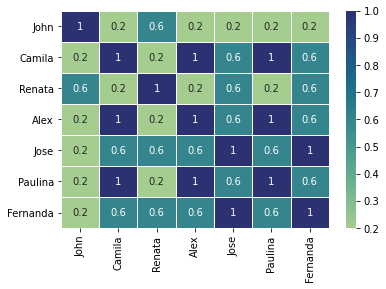

In [63]:
sns.heatmap(sim_df, annot=True, linewidth=0.5, cmap='crest')

## Similitud en Datos Multi Estado Ordinales 


Las variables ordinales pueden considerarse como variables cuantitativas si la asignación del ranking refleja en cierta forma una diferencia entre los estados de la variable. Por
ejemplo, si se considera la resistencia al fuego de un conjunto de muestras usando las categorías:
`muy baja`, `baja`, `media`, `alta` y `muy alta`; puede ser razonable asignarle valores: 0, 1, 2, 3, 4,
respectivamente ya que las categorías consecutivas pueden considerarse como equidistantes. De
esta manera, la nueva variable numérica podría ser tratada como una variable cuantitativa. 

In [64]:
data = {'Genero':['M','F','M','F','F','F','F'],
         'Nombre':['John','Camila','Renata','Alex','Jose','Paulina','Fernanda'],
         'Estatus Marital':['Casado','Soltero', 'Divorciado','Soltero', 'Divorciado', 'Soltero','Divorciado'],
         'Educación':['Primaria', 'Terciaria', 'Primaria', 'Secundaria', 'Primaria', 'Terciaria', 'Primaria']}
df = pd.DataFrame(data)
df

,Genero,Nombre,Estatus Marital,Educación
0,M,John,Casado,Primaria
1,F,Camila,Soltero,Terciaria
2,M,Renata,Divorciado,Primaria
3,F,Alex,Soltero,Secundaria
4,F,Jose,Divorciado,Primaria
5,F,Paulina,Soltero,Terciaria
6,F,Fernanda,Divorciado,Primaria


In [66]:
df.set_index('Nombre', inplace=True)

In [67]:
df

,Genero,Estatus Marital,Educación
Nombre,,,
John,M,Casado,Primaria
Camila,F,Soltero,Terciaria
Renata,M,Divorciado,Primaria
Alex,F,Soltero,Secundaria
Jose,F,Divorciado,Primaria
Paulina,F,Soltero,Terciaria
Fernanda,F,Divorciado,Primaria


In [69]:
df_educacion = df[['Educación']]
df_educacion

,Educación
Nombre,
John,Primaria
Camila,Terciaria
Renata,Primaria
Alex,Secundaria
Jose,Primaria
Paulina,Terciaria
Fernanda,Primaria


In [70]:
df_educacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, John to Fernanda
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Educación  7 non-null      object
dtypes: object(1)
memory usage: 112.0+ bytes


In [71]:
df_educacion = df_educacion.astype('category')
df_educacion

,Educación
Nombre,
John,Primaria
Camila,Terciaria
Renata,Primaria
Alex,Secundaria
Jose,Primaria
Paulina,Terciaria
Fernanda,Primaria


In [73]:
df_educacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, John to Fernanda
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Educación  7 non-null      category
dtypes: category(1)
memory usage: 195.0+ bytes


In [75]:
df_educacion['Educación_codes'] = df_educacion['Educación'].cat.codes
df_educacion

,Educación,Educación_codes
Nombre,,
John,Primaria,0
Camila,Terciaria,2
Renata,Primaria,0
Alex,Secundaria,1
Jose,Primaria,0
Paulina,Terciaria,2
Fernanda,Primaria,0


In [79]:
df_total = df_numerico.join(df_educacion[['Educación_codes']])
df_total

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero,Educación_codes
Nombre,,,,,,
John,0,1,1,0,0,0
Camila,1,0,0,0,1,2
Renata,0,1,0,1,0,0
Alex,1,0,0,0,1,1
Jose,1,0,0,1,0,0
Paulina,1,0,0,0,1,2
Fernanda,1,0,0,1,0,0


## Similitud en datos cuantitativos

Generalizando para $m$ muestras y $n$ variables aleatorias cuantitativas (rasgos funcionales), la
distancia usual que se observa entre el par de unidades $x_i$ y $x_j$ cuando se representan en el espacio
de coordenadas definido por n variables cuantitativas, es conocida como distancia Euclideana:

$$d_{i,j} = \sqrt{\sum_{t=1}^n (x_{it} - x_{jt})^2}$$

donde $n$ son los rasgos funcionales. La distancia Euclídeana es la más conocida, la de mayor uso y
es la herramienta fundamental de cálculo de la mayoría de los métodos multivariados basados en
distancias. 

Sin embargo, presenta varios inconvenientes: 

>no está acotada, es sensible a cambios de
escalas y considera las n variables estocásticamente independientes.

Se han propuesto varias transformaciones que permiten minimizar y/o eliminar estos inconvenientes, entre otras: 

>se recomienda utilizarla en caso de homogeneidad entre la naturaleza física de las variables, cuando esto no es posible se puede estandarizar cada variable por su rango $r_t$ asegurando que la contribución de cualquier variable estará acotada en el intervalo (0,1).

Además puede dividirse por la cantidad de variables obteniendo una distancia media que oscilará en este
rango y facilita su conversión a similaridad, la expresión estará definida por:

$$d_{i,j} = \sqrt{\frac{1}{n} \sum_{t=1}^n \frac{(x_{it} - x_{jt})^2}{r_t}}$$

A continuación se presenta la formulación y propiedades de las distancias y disimilaridades no
negativas más utilizadas en los estudios de iversidad. Las más usadas son las distancias: Euclídea, Manhattan y Mahalanobis.

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Euclideana| $\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^2}$                      |si         |[0,$\infty$]        |
|Manhattan    | $ \sum_{t=1}^n |x_{it} - x_{jt}|$                  |si         |[0,$\infty$]        |
|Bray-Curtis               | $\frac{ \sum_{t=1}^n |x_{it} - x_{jt}|}{ \sum_{t=1}^n (x_{it} + x_{jt})}$            |si         |[0,$\infty$]      |
|Canberra                 | $\sum_{t=1}^n\frac{ |x_{it} - x_{jt}|}{(|x_{it}| + |x_{jt}|)}$                       |si         |[0,$\infty$]       |
|Minkowski              | $^p\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^p}$ |si         |[0,$\infty$]        |
|Mihalanobis              | $\sqrt{ \sum_{l=1}^n\sum_{t=1}^n (x_{it} - x_{jt}) \sigma_{lt}^{-1}(x_{il} - x_{jl})}$                       |si         |[0,$\infty$]        |




In [80]:
import scipy.spatial.distance as sc

### Ejemplo:


In [82]:
x = np.array([[2,3],
              [20,30],
              [-2,3],
             [2,-3]])
df_x = pd.DataFrame(x, columns=['x1','x2'])
df_x


,x1,x2
0,2,3
1,20,30
2,-2,3
3,2,-3


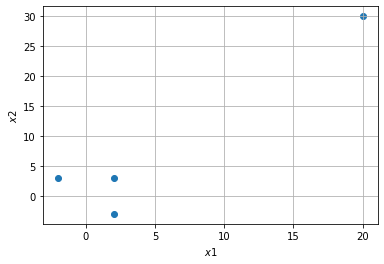

In [86]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df_x['x1'].values,df_x['x2'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

In [87]:
sc.pdist(df_x, 'euclidean')

array([32.44996148,  4.        ,  6.        , 34.82814953, 37.58989226,
        7.21110255])

In [88]:
sc.squareform(sc.pdist(df_x, 'euclidean'))

array([[ 0.        , 32.44996148,  4.        ,  6.        ],
       [32.44996148,  0.        , 34.82814953, 37.58989226],
       [ 4.        , 34.82814953,  0.        ,  7.21110255],
       [ 6.        , 37.58989226,  7.21110255,  0.        ]])

In [89]:
M_Sim = pd.DataFrame(sc.squareform(sc.pdist(df_x, 'euclidean')), 
                     index = df_x.index.to_list(), columns=df_x.index.to_list())
M_Sim

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


In [90]:
def pdistance_matrix(df, metric):
    
    M_Sim = pd.DataFrame(sc.squareform(sc.pdist(df, metric)), 
                     index = df.index.to_list(), columns=df.index.to_list())
    
    return M_Sim

In [92]:
pdistance_matrix(df_x,'euclidean')

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


In [93]:
df_total

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero,Educación_codes
Nombre,,,,,,
John,0,1,1,0,0,0
Camila,1,0,0,0,1,2
Renata,0,1,0,1,0,0
Alex,1,0,0,0,1,1
Jose,1,0,0,1,0,0
Paulina,1,0,0,0,1,2
Fernanda,1,0,0,1,0,0


In [96]:
df_total['cat_random']=np.random.rand(len(df_total))

In [97]:
df_total

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero,Educación_codes,cat_random
Nombre,,,,,,,
John,0,1,1,0,0,0,0.661658
Camila,1,0,0,0,1,2,0.228600
Renata,0,1,0,1,0,0,0.252791
Alex,1,0,0,0,1,1,0.813657
Jose,1,0,0,1,0,0,0.342413
Paulina,1,0,0,0,1,2,0.319251
Fernanda,1,0,0,1,0,0,0.029276


In [99]:
Msim = pdistance_matrix(df_total,'euclidean')
Msim

,John,Camila,Renata,Alex,Jose,Paulina,Fernanda
John,0.000000,2.861388,1.472132,2.241228,2.025319,2.849077,2.097596
Camila,2.861388,0.000000,2.828531,1.158573,2.452132,0.090651,2.457586
Renata,1.472132,2.828531,0.000000,2.305335,1.417051,2.829208,1.431768
Alex,2.241228,1.158573,2.305335,0.000000,1.795013,1.115543,1.901382
Jose,2.025319,2.452132,1.417051,1.795013,0.000000,2.449599,0.313137
Paulina,2.849077,0.090651,2.829208,1.115543,2.449599,0.000000,2.466594
Fernanda,2.097596,2.457586,1.431768,1.901382,0.313137,2.466594,0.000000


In [119]:
Msim['Camila'].sort_values().index[1],Msim['Camila'].sort_values()[1]

('Paulina', 0.09065084757703323)

### Estandarización de datos

$$z= \frac{x-\mu}{\sigma}$$

In [104]:
df_x

,x1,x2
0,2,3
1,20,30
2,-2,3
3,2,-3


In [108]:
df_x_std = df_x.copy()
df_x_std['x1'] =  (df_x['x1'] - df_x['x1'].mean())/df_x['x1'].std()
df_x_std['x2'] =  (df_x['x2'] - df_x['x2'].mean())/df_x['x2'].std()

In [109]:
df_x_std

,x1,x2
0,-0.355371,-0.355371
1,1.472252,1.472252
2,-0.761510,-0.355371
3,-0.355371,-0.761510


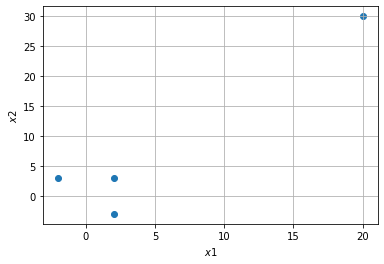

In [110]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df_x['x1'].values,df_x['x2'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

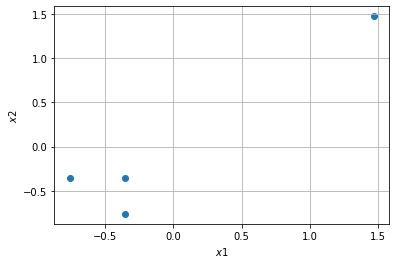

In [111]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df_x_std['x1'].values,df_x_std['x2'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

In [112]:
pdistance_matrix(df_x_std, 'euclidean')

,0,1,2,3
0,0.000000,2.584649,0.406138,0.406138
1,2.584649,0.000000,2.886156,2.886156
2,0.406138,2.886156,0.000000,0.574367
3,0.406138,2.886156,0.574367,0.000000


## Actividad 

Calcular las distancias de similitud por:

1.- Distacia Jaccard (datos originales) datos estandarizados

2.- Distacia braycurtis (datos originales) datos estandarizados

3.- Manhatan (datos originales) datos estandarizados

4.- Euclideana estandarizada  (datos originales)

ver si las matrices de similitud obtenidas cambian con respecto a los datos originales y los estandarizados

In [113]:
def pdistance_matrix(df, metric):
    
    M_Sim = pd.DataFrame(sc.squareform(sc.pdist(df, metric)), 
                     index = df.index.to_list(), columns=df.index.to_list())
    
    return M_Sim

In [ ]:
#Validar las metricas de distancia del método pdist
#Añadir este método a la librería HAIA (crar una clase que se llama MedidasSimilitud, 
# o añadir este metodo en la clase HyAIA)

### Similitud por Coseno

La función de similitud del coseno es:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$ A $ y $ B $ representan los vectores y $ A_i $ o $ B_i $ representan el índice i de ese vector.
& Hay que tener en cuenta que si A y B son idénticos, se obtendrá $ cos (\theta) = 1 $.

* De lo contrario, si son totalmente opuestos, es decir, $ A = -B $, obtendría $ cos (\theta) = -1 $.
* Si obtiene $ cos (\ theta) = 0 $, eso significa que son ortogonales (o perpendiculares).
* Los números entre 0 y 1 indican una puntuación de similitud.
* Los números entre -1-0 indican una puntuación de disimilitud.

### Deducción

$$A\cdot B = ||A||||B||cos(\theta)$$

$$\frac{A\cdot B}{||A||||B||} = cos(\theta)= similaridad \in [-1,1]$$

$$d= 1 - similaridad = 1 - \frac{A\cdot B}{||A||||B||} \in \{0,2\}$$

In [124]:
def cosine_similarity(A,B):
    dot = np.dot(A,B)
    norm_a = np.sqrt(np.dot(A,A))
    norm_b = np.sqrt(np.dot(B,B))
    
    cos = dot/(norm_a*norm_b)
    
    return cos

In [125]:
A = np.array([1,5,7])
B = np.array([1,0,-8])


In [126]:
cosine_similarity(A,B) # En el rango de [-1,1]

-0.7877263614433762

In [127]:
A = np.array([1,5,7])
B = np.array([10,50,70])


In [128]:
cosine_similarity(A,B)

1.0

In [129]:
def cosine_similarity_distance(A,B):
    dot = np.dot(A,B)
    norm_a = np.sqrt(np.dot(A,A))
    norm_b = np.sqrt(np.dot(B,B))
    
    cos = dot/(norm_a*norm_b)
    
    return 1-cos

In [130]:
cosine_similarity_distance(A,B)

0.0

In [131]:
df_AB = pd.DataFrame(np.array([[1,5,7],
                               [10,50,70]]))

In [132]:
pdistance_matrix(df_AB, 'cosine')

,0,1
0,0.0,0.0
1,0.0,0.0


In [133]:
df_x

,x1,x2
0,2,3
1,20,30
2,-2,3
3,2,-3


In [134]:
pdistance_matrix(df_x, 'cosine')

,0,1,2,3
0,0.000000,0.000000,0.615385,1.384615
1,0.000000,0.000000,0.615385,1.384615
2,0.615385,0.615385,0.000000,2.000000
3,1.384615,1.384615,2.000000,0.000000


In [135]:
pdistance_matrix(df_x, 'euclidean')

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


### ¿Qué pasa si mi dataset contiene todo los tipos de datos?

# Datos Mixtos

Supongamos que sobre S muestras, representadas en la matriz $X$, se han observado simultáneamente diferentes muestras que por su naturaleza pueden corresponder a variables binarias,
cualitativas y cuantitativas. 

>La distancia entre individuos que presenten esta combinación de características puede ser medida a través de la similaridad de `Gower (1971)`. Esta similaridad es útil para tipos de datos mixtos.

La similaridad $\delta_{ijt}$ entre la $i$-ésima y la $j$-ésima muestra para la variable $t$, promediado sobre las $T$ variables o características, es la medida de similaridad propuesta por Grower (1971):

$$\delta_{ij}=\frac{1}{T} \delta_{ijt}$$

>En el caso de variables **binarias o cualitativas**, $\delta_{ijt}=1$ si $x_{it}=x_{jt}$ y $\delta_{ijt}=0$ si $x_{it}\neq x_{jt}$. 

>Si la variable es **cuantitativa** la similaridad entre los individuos estará dada por:

$$\delta_{ijt}=1-\frac{|x_{it} - x_{jt}|}{rt}$$

 donde $r_t$ es el rango (diferencia entre el máximo y el mínimo) de la $t$-ésima característica sobre toda la población. Si $x_{it}=x_{jt}$ entonces $\delta_{ijt}=1$, cuando $x_{it}$ y $x_{jt}$ se encuentan en los extremos de $r_t$ entonces $\delta_{ijt}=0$, y si $x_{it}$ y $x_{jt}$ son valores intermedios de $r_t$ entonces $0\leq \delta_{ijt} \leq 1$
 
 
 El tratamiento de los datos faltantes, la consideración de la ausencia simultánea de la característica, y la ponderación relativa de características, son debilidades metodológicas que afectan las medidas de similitud y distancias referidas hasta ahora para todo tipo de variables. 
 
 En este sentido, Gower introdujo en la expresión de la medida de similitud, ponderaciones denominadas $w_{ijt}$, como una función que
depende de cada par de datos $x_{it}$ y $x_{jt}$ , obteniendo la siguiente expresión general:

$$\delta_{ij} = \frac{\sum_{t=1}^T w_{ijt}\delta_{ijt}}{\sum_{t=1}^T w_{ijt}}$$

## Ejemplo:

In [136]:
df = pd.DataFrame([[1,2.6,'A'], [12,5,'X'], [4,7,'A']])
df.columns=['Num_1','Num_2', 'Num_3']
df

,Num_1,Num_2,Num_3
0,1,2.6,A
1,12,5.0,X
2,4,7.0,A



1. Encontrar la distancia Manhattan entre cada muestra para las variables numéricas
2. Normalizar la matriz de similitud

In [138]:
#Calculando la medida de similitud para Num1
delta_1 = sc.squareform(sc.pdist(df[['Num_1']], 'cityblock'))
delta_1

array([[ 0., 11.,  3.],
       [11.,  0.,  8.],
       [ 3.,  8.,  0.]])

In [139]:
np.ptp(df['Num_1'])

11

In [140]:
delta_1 = delta_1/max(np.ptp(df['Num_1']),1)
delta_1

array([[0.        , 1.        , 0.27272727],
       [1.        , 0.        , 0.72727273],
       [0.27272727, 0.72727273, 0.        ]])

In [141]:
#Calculando la medida de similitud para Num2
delta_2 = sc.squareform(sc.pdist(df[['Num_2']], 'cityblock'))
delta_2

array([[0. , 2.4, 4.4],
       [2.4, 0. , 2. ],
       [4.4, 2. , 0. ]])

In [142]:
delta_2 = delta_2/max(np.ptp(df['Num_2']),1)
delta_2

array([[0.        , 0.54545455, 1.        ],
       [0.54545455, 0.        , 0.45454545],
       [1.        , 0.45454545, 0.        ]])

Calcular la distancia de similitud para las variables categóricas. 

1. Primero hay que convertir las variables categoricas nominales a variables dummies y después calcular las distancias de similitud (DICE)

In [143]:
dummy_df = pd.get_dummies(df['Num_3'])
dummy_df

,A,X
0,1,0
1,0,1
2,1,0


In [144]:
delta_3 = sc.squareform(sc.pdist(dummy_df, 'dice'))
delta_3

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

In [145]:
w1=w2=w3=1

In [146]:
gower_sim = (w1*delta_1 + w2*delta_2 + w3*delta_3)/(w1+w2+w3)
gower_sim

array([[0.        , 0.84848485, 0.42424242],
       [0.84848485, 0.        , 0.72727273],
       [0.42424242, 0.72727273, 0.        ]])

In [ ]:
#!pip install gower

In [147]:
import gower

In [ ]:
#!pip install gower

In [ ]:
#help(gower.gower_matrix)

In [148]:
gower.gower_matrix(df)

array([[0.        , 0.8484848 , 0.4242424 ],
       [0.8484848 , 0.        , 0.72727275],
       [0.4242424 , 0.72727275, 0.        ]], dtype=float32)

## Ejemplo 2:

In [149]:
# Diccionario con datos de clientes
dictionary = {"age": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "gender": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "civil_status": ["SINGLE", "SINGLE", "SINGLE", "MARRIED", "MARRIED", "SINGLE", "MARRIED", "DIVORCED", "MARRIED", "DIVORCED"], 
              "salary": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
              "has_children": [False, False, False, True, True, False, False, False, False, True], 
              "purchaser_type": ["LOW_PURCHASER", "LOW_PURCHASER", "LOW_PURCHASER", "HEAVY_PURCHASER", "HEAVY_PURCHASER", "LOW_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "LOW_PURCHASER"]}


dataframe = pd.DataFrame.from_dict(dictionary)

In [150]:
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type
0,22,M,SINGLE,18000,False,LOW_PURCHASER
1,25,M,SINGLE,23000,False,LOW_PURCHASER
2,30,F,SINGLE,27000,False,LOW_PURCHASER
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
5,47,M,SINGLE,20000,False,LOW_PURCHASER
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER
9,90,M,DIVORCED,70000,True,LOW_PURCHASER


In [154]:
new_cols = [f'customer_{c}' for c in range(0,len(dataframe))]
new_cols

['customer_0',
 'customer_1',
 'customer_2',
 'customer_3',
 'customer_4',
 'customer_5',
 'customer_6',
 'customer_7',
 'customer_8',
 'customer_9']

In [155]:
dataframe['Customer'] = new_cols

In [157]:
dataframe.set_index('Customer', inplace=True)

In [158]:
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type
Customer,,,,,,
customer_0,22,M,SINGLE,18000,False,LOW_PURCHASER
customer_1,25,M,SINGLE,23000,False,LOW_PURCHASER
customer_2,30,F,SINGLE,27000,False,LOW_PURCHASER
customer_3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
customer_4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
customer_5,47,M,SINGLE,20000,False,LOW_PURCHASER
customer_6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
customer_7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
customer_8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER


In [159]:
def MatSim_Gower(df):
    M_Sim = pd.DataFrame(gower.gower_matrix(df), 
                     index = df.index.to_list(), columns=df.index.to_list())
    return M_Sim

In [160]:
MatSim_Gower(df)

,0,1,2
0,0.000000,0.848485,0.424242
1,0.848485,0.000000,0.727273
2,0.424242,0.727273,0.000000


In [162]:
MatSimGow_df = MatSim_Gower(dataframe)
MatSimGow_df

,customer_0,customer_1,customer_2,customer_3,customer_4,customer_5,customer_6,customer_7,customer_8,customer_9
customer_0,0.000000,0.023379,0.215121,0.750754,0.766968,0.067685,0.484729,0.508296,0.451357,0.666667
customer_1,0.023379,0.000000,0.191742,0.727376,0.743590,0.063537,0.461350,0.484917,0.427979,0.643288
customer_2,0.215121,0.191742,0.000000,0.535634,0.551848,0.230769,0.602941,0.626508,0.582391,0.784879
customer_3,0.750754,0.727376,0.535634,0.000000,0.016214,0.727187,0.567308,0.757541,0.578808,0.749246
customer_4,0.766968,0.743590,0.551848,0.016214,0.000000,0.723793,0.551094,0.741327,0.575415,0.733032
customer_5,0.067685,0.063537,0.230769,0.727187,0.723793,0.000000,0.417044,0.440611,0.383673,0.598982
customer_6,0.484729,0.461350,0.602941,0.567308,0.551094,0.417044,0.000000,0.190234,0.062783,0.681938
customer_7,0.508296,0.484917,0.626508,0.757541,0.741327,0.440611,0.190234,0.000000,0.223605,0.491704
customer_8,0.451357,0.427979,0.582391,0.578808,0.575415,0.383673,0.062783,0.223605,0.000000,0.715309
customer_9,0.666667,0.643288,0.784879,0.749246,0.733032,0.598982,0.681938,0.491704,0.715309,0.000000


In [170]:
for col in MatSimGow_df.columns:
    CustmasSim = MatSimGow_df.loc[col].sort_values().index[1]
    CustSimilitud = MatSimGow_df.loc[col].sort_values()[1]
    print(f'El cliente más similar a {col} ---> {(CustmasSim, CustSimilitud)}' )
    

El cliente más similar a customer_0 ---> ('customer_1', 0.023378583)
El cliente más similar a customer_1 ---> ('customer_0', 0.023378583)
El cliente más similar a customer_2 ---> ('customer_1', 0.19174208)
El cliente más similar a customer_3 ---> ('customer_4', 0.016214179)
El cliente más similar a customer_4 ---> ('customer_3', 0.016214179)
El cliente más similar a customer_5 ---> ('customer_1', 0.06353696)
El cliente más similar a customer_6 ---> ('customer_8', 0.06278281)
El cliente más similar a customer_7 ---> ('customer_6', 0.19023378)
El cliente más similar a customer_8 ---> ('customer_6', 0.06278281)
El cliente más similar a customer_9 ---> ('customer_7', 0.49170437)


Podemos interpretar la matriz de la siguiente manera. En la primera columna, vemos la diferencia del primer cliente con todos los demás. Este cliente es similar al segundo, tercer y sexto cliente.